In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import sys
import imageio

import pypom

[cam0]::Extrinsics kept in 'cm'.
Rectangle(xmin=262.4973572241779, ymin=92.17359280985929, xmax=292.4583900104953, ymax=223.90137604011605, visible=None, ID=None, position=None)


<IPython.core.display.Javascript object>


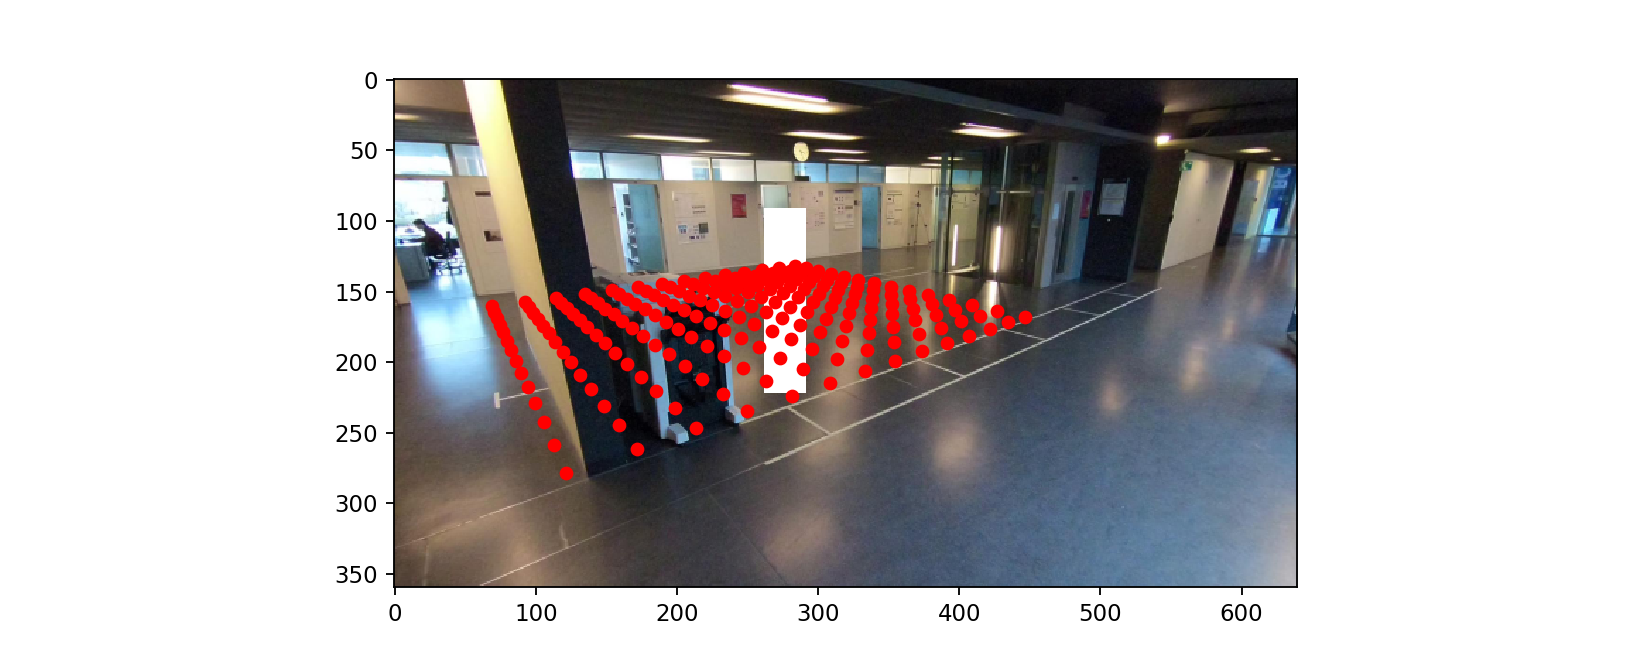

In [44]:
view_shape = (1080//3, 1920//3)

room = pypom.Room(width=700, 
                   height=700, 
                   step_x=50, 
                   step_y=50, 
                   origin_x=-350, 
                   origin_y=-600, 
                   origin_z=0)
world_grid = room.get_world_grid()

camera = pypom.CameraKRt.from_json("cam0", "intrinsics_cam0.json", "extrinsics_cam0.json", view_shape, "cm")
proj = camera.project_bottom_points(world_grid)

cilinder = pypom.Cilinder(radius=16, 
                           height=180, 
                           base_center=world_grid[126])

rectangle = cilinder.project_with(camera)
print(rectangle)

img = pypom.utils.downsample_image(imageio.imread("frame_cam0_undistorted.JPG"), view_shape, msigma=None)
img[rectangle.slices()] = 255

plt.figure(figsize=(10,4))
plt.imshow(img)
plt.plot(proj[:,0], proj[:,1], 'r.', markersize=10)